# Smartphone dataset example
Aerobic actions were recorded from subjects using the Inertial Measurement Unit (IMU) on an Apple iPhone 4 smartphone. The IMU includes a 3D accelerometer, gyroscope, and magnetometer. Each sample was taken at 60Hz, and manually trimmed to 500 samples (8.33s) to eliminate starting and stopping movements. iPhone is always clipped to the belt on the right hand side.

Each file contains 500 rows, each row with the following information:
Acc_x, Acc_y, Acc_z, Gyr_x, Gyr_y, Gyr_z, Mag_x, Mag_y, Mag_z.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import mogptk

In [2]:
# plot config
sns.set_context('paper', font_scale=1.3)
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (10, 5)

# MOGP prediction on the sensor values
We use the 9 sensor values as channels, giving 9 channels in total.

All the data is sampled at 60Hz. With 500 samples (~8.3 segs) for each file.

## Example 1: cycling
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is in a bike.

In [3]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S05/bike3.csv', header=None)

# get values
y = df.values

# generate time values
t = (np.arange(0, 500) / 60)

In [4]:
# col names
cols = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z', 'Mag_x', 'Mag_y', 'Mag_z']

# data container
data = mogptk.DataSet()

# add data to container
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

### Simulate sensor failure

In [5]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    channel.set_prediction_range(start=0.0, end=8.3, n=200)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

In [6]:
# define model
model = mogptk.MOSM(data, Q=3)

# initialize parameters with BNSE
model.init_parameters('BNSE')

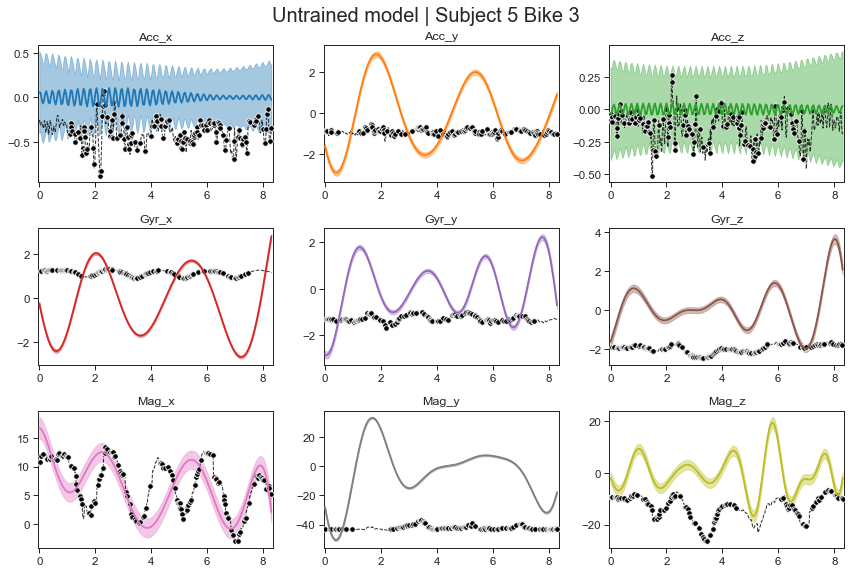

In [7]:
model.predict()
model.plot_prediction(grid=(3,3), title='Untrained model | Subject 5 Bike 3');

In [8]:
%%time
# model training, WARNING TAKES 20 MINUTES
model.train('L-BFGS-B', maxiter=500, tol=1e-6)

CPU times: user 18min 9s, sys: 16.8 s, total: 18min 26s
Wall time: 17min 14s


(<Figure size 864x561.6 with 9 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f80416ccf10>,
       dtype=object))

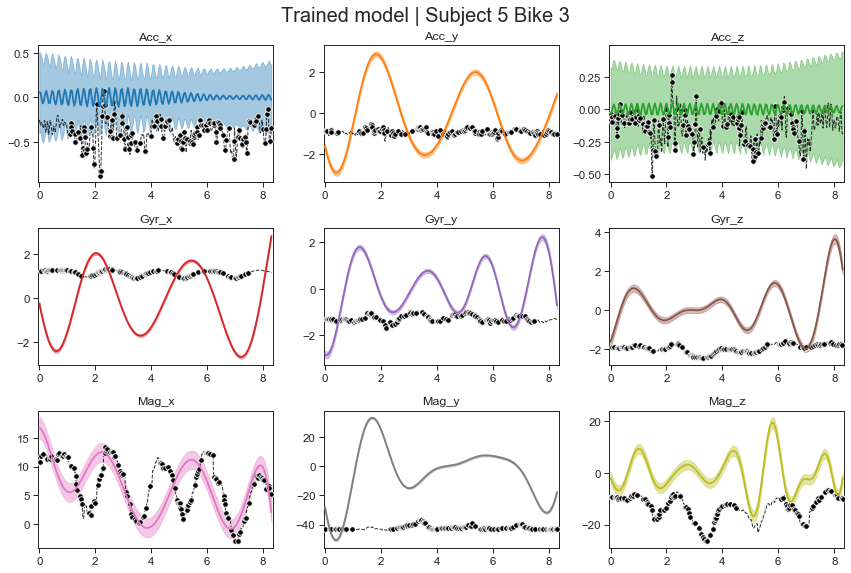

In [9]:
model.plot_prediction(grid=(3, 3), title='Trained model | Subject 5 Bike 3')

## Example 2: Subject 5 walking 3
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is walking.

In [10]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S01/walking2.csv', header=None)

# get values
y = df.values

# generate time values
t = np.arange(0, 500) / 60

# data container
data = []

# add data to container
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

In [11]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

In [12]:
%%time
# define model
model = mogptk.MOSM(data, Q=3)

# initialize parameters with BNSE
model.init_parameters()

# fit to data
model.train('L-BFGS-B', maxiter=500, tol=1e-6)

CPU times: user 18min 38s, sys: 31.8 s, total: 19min 10s
Wall time: 17min 16s


(<Figure size 864x561.6 with 9 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f80874b5910>,
       dtype=object))

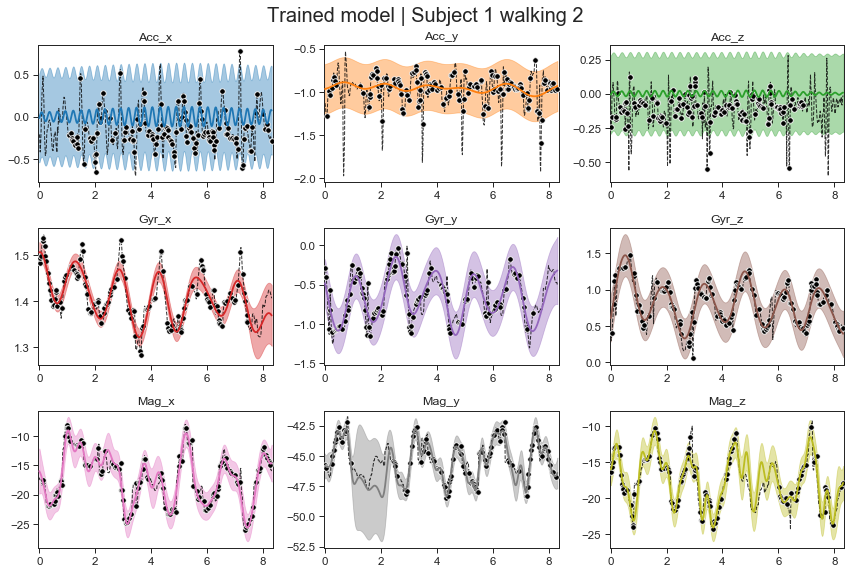

In [14]:
model.predict()
model.plot_prediction(grid=(3, 3), title='Trained model | Subject 1 walking 2')